In [11]:
from jinja2 import Template
import matplotlib.pyplot as plt
import csv

In [12]:
def get_data():
  col_names = ['student_id', 'course_id', 'marks']
  data = list(csv.DictReader(open('data.csv'), fieldnames=col_names))
  return data[1:]


# get_data()

In [13]:
def get_student_data(student_id):
  data = get_data()
  student_data = [row for row in data if row['student_id'] == student_id]
  if len(student_data) == 0:
    raise Exception('invalid student_id')

  total_marks = sum([int(row['marks']) for row in student_data])
  return student_data, total_marks


get_student_data('1001')

([{'student_id': '1001', 'course_id': ' 2001', 'marks': ' 56'},
  {'student_id': '1001', 'course_id': ' 2002', 'marks': ' 58'},
  {'student_id': '1001', 'course_id': ' 2004', 'marks': ' 35'}],
 149)

In [14]:
def get_course_data(course_id):
  data = get_data()
  course_data = [row for row in data if row['course_id'] == course_id]
  marks = [int(row['marks']) for row in course_data]
  avg_marks = sum(marks)/len(marks)
  max_marks = max(marks)
  return marks, avg_marks, max_marks


get_course_data(' 2001')

([56, 67, 78, 90, 45], 67.2, 90)

In [15]:
def generate_error_html():
  html = open('./templates/error.html').read()
  open('output.html', 'w+').write(html)


# generate_error_html()

In [33]:
def generate_student_html(student_id):
  try:
    student_data, total_marks = get_student_data(student_id)
  except:
    print('error detected!!')
    return generate_error_html()
  template_string = open('./templates/student.html').read()
  html = Template(template_string).render(student_data=student_data, total_marks=total_marks)
  open('output.html', 'w+').write(html)


# generate_student_html('1001')

In [17]:
def generate_histogram(course_id, marks):
  plt.hist(marks)
  plt.title(f'Marks vs Freq for Course ID: {course_id}')
  plt.xlabel('Marks')
  plt.ylabel('Freq')
  plt.savefig('histogram.png')

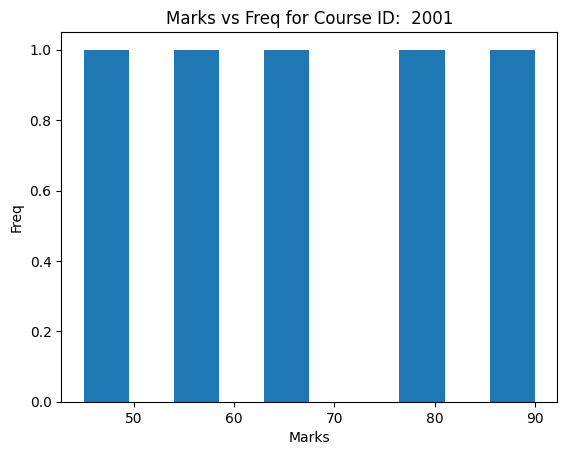

In [32]:
def generate_course_html(course_id):
  try:
    marks, avg_marks, max_marks = get_course_data(course_id)
  except:
    return generate_error_html()
  template_string = open('./templates/course.html').read()
  html = Template(template_string).render(avg_marks=avg_marks, max_marks=max_marks)
  open('output.html', 'w+').write(html)
  generate_histogram(course_id, marks)


# generate_course_html(' 2001')